<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Lesson1_Intro_Base/ML_AI_Lesson1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Занятие 1. Основы линейной регрессии

In [1]:
import pandas as pd
import numpy as np
import sklearn
from matplotlib import pyplot as plt

from sklearn.linear_model import SGDRegressor
from sklearn.datasets import load_diabetes

In [2]:
np.random.seed(42)

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
X, y = load_diabetes(return_X_y=True,as_frame=True)

**Target:** a quantitative measure of disease progression one year after baseline

**Attribute Information:**
      - age     age in years

      - sex

      - bmi     body mass index

      - bp      average blood pressure

      - s1      tc, total serum cholesterol

      - s2      ldl, low-density lipoproteins

      - s3      hdl, high-density lipoproteins

      - s4      tch, total cholesterol / HDL

      - s5      ltg, possibly log of serum triglycerides level

      - s6      glu, blood sugar level

# Базовый EDA

Как выглядят данные?

In [5]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [6]:
X.shape

(442, 10)

Есть ли ошибочные значения, выбросы?

Что можно сказать про масштабы признаков?

In [7]:
X.describe().round(4)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000
mean,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000
std,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476
min,-0.1072,-0.0446,-0.0903,-0.1124,-0.1268,-0.1156,-0.1023,-0.0764,-0.1261,-0.1378
25%,-0.0373,-0.0446,-0.0342,-0.0367,-0.0342,-0.0304,-0.0351,-0.0395,-0.0332,-0.0332
50%,0.0054,-0.0446,-0.0073,-0.0057,-0.0043,-0.0038,-0.0066,-0.0026,-0.0019,-0.0011
75%,0.0381,0.0507,0.0312,0.0356,0.0284,0.0298,0.0293,0.0343,0.0324,0.0279
max,0.1107,0.0507,0.1706,0.1320,0.1539,0.1988,0.1812,0.1852,0.1336,0.1356


Что можно сказать про целевую переменную?

In [8]:
y.head()

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


<Axes: >

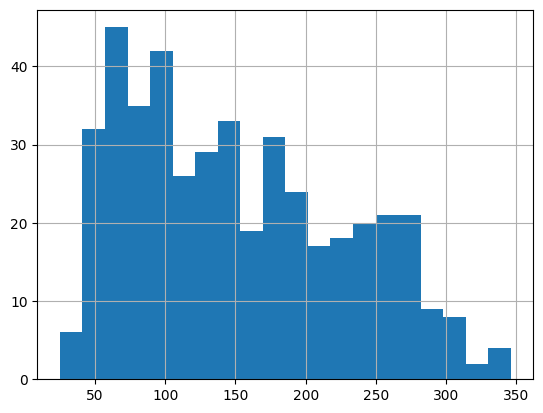

In [9]:
y.hist(bins=20)

Есть ли пропуски в данных?

Какой формат у данных?

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


Посмотрим на корреляции

<Axes: >

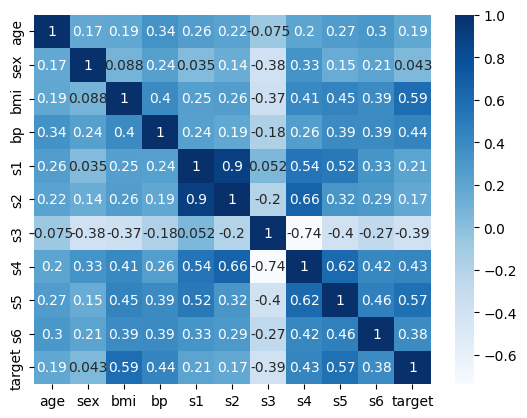

In [11]:
import seaborn as sns

X['target'] = y

sns.heatmap(X.corr(), cmap="Blues", annot=True)

Смотрим на распределение признаков по boxplot

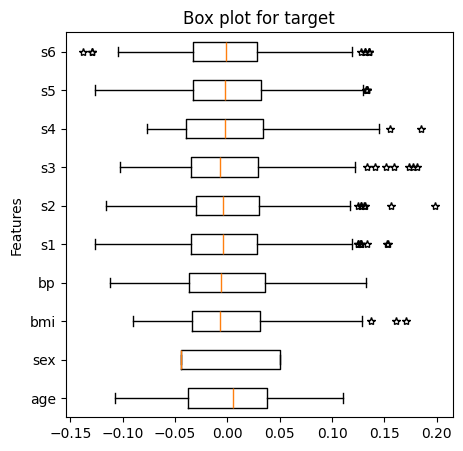

In [12]:
X.drop('target', axis=1, inplace=True)

fig,ax = plt.subplots(figsize=(5,5))
ax.boxplot(x=X,
           vert=False,
           labels=X.columns,
           sym='*'
          )
plt.title('Box plot for target')
plt.ylabel('Features')
plt.plot();

**Выводы:**

1) Данные без пропусков, очевидных выбросов и центрированы

2) Целевая переменная визуально имеет распределение, близкое к нормальному

3) Данные отображаются в верном формате

4) По boxplot не делаем выводы о том, что надо удалять "выбросы"

5) Целевая переменная имеет линейную взаимосвязь с несколькими признаками. Применение методов машинного обучения обоснованно

# Машинное обучение

In [68]:
# Разобьем данные на обучающую и тестовую выборки

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

(array([30., 58., 45., 50., 37., 33., 28., 30., 14.,  6.]),
 array([ 25. ,  57.1,  89.2, 121.3, 153.4, 185.5, 217.6, 249.7, 281.8,
        313.9, 346. ]),
 <BarContainer object of 10 artists>)

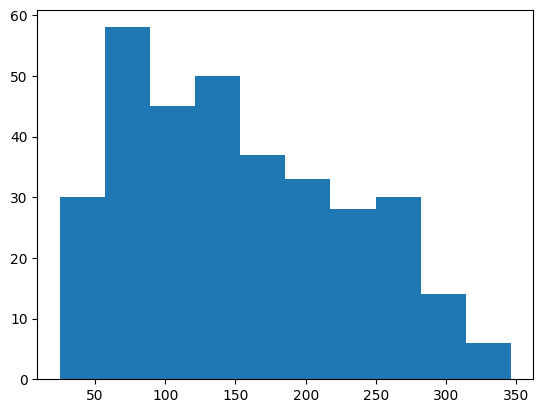

In [69]:
plt.hist(y_train)

(array([14., 21., 18.,  9., 12.,  9.,  6.,  8., 11.,  3.]),
 array([ 37. ,  64.3,  91.6, 118.9, 146.2, 173.5, 200.8, 228.1, 255.4,
        282.7, 310. ]),
 <BarContainer object of 10 artists>)

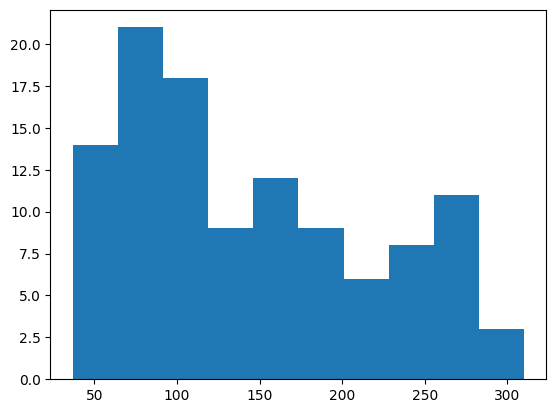

In [70]:
plt.hist(y_test)

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = LinearRegression()

model.fit(X_train, y_train)

pred = model.predict(X_test)

print(f'''Metrics:
mae={mean_absolute_error(y_test, pred)}
mse={mean_squared_error(y_test, pred)}
R2={r2_score(y_test, pred)}
''')

Metrics:
mae=41.54850685988061
mse=2848.3106508475057
R2=0.4849058889476755



Как мы говорили раньше, метрика должна отражать реальную цель из мира, поэтому нередко возникает потребность в написании своих собственных метрик, которые лучше описывают вашу конретную реальность. В задачах, связанных с медициной (как у нас сейчас), довольно высокая цена ошибки (у человека есть диабет, а мы его не нашли). Поэтому для того, чтобы ответить на вопрос, можно ли модель использовать в жизни, имеет смысл использовать метрику максимальной ошибки модели

$max error = max(|\hat y_{i} - y_{i}|)$

In [72]:
def max_error(y_true, y_pred):
    max_erorr = np.abs(y_true - y_pred).max()
    return max_erorr

def quantile_error(y_true, y_pred, q=0.95):
    q_error = np.quantile(np.abs(y_true -  y_pred), q)
    return q_error

# Оценим максимальную ошибку в обоих случаях

print(f'Loss: {max_error(y_test, pred)}')

Loss: 153.65720098110162


В sklearn есть большое количество уже реализованных метрик - можете посмотреть их список и варианты применения здесь

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

#  Кросс-валидация

Когда выбран функционал и метрика, можно задаться вопросом: а насколько я могу доверять полученным результатам (значениям метрики), не являются ли они случайности или совпадением ? Кросс-валидация - это инструмент для ответа на этот вопрос.

In [73]:
from sklearn.model_selection import cross_validate, cross_val_score

Здесь можно посмотреть какие параметры требуются для этой функции
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html

In [74]:
from sklearn.model_selection import cross_validate

# проверим на кросс-валидации значения ошибок MSE, MAE, R2
# для линейной регрессии, обученной с помощью функционала MSE

num_splits=5

cv_res = cross_validate(model,
                     X,
                     y,
                     scoring='neg_mean_squared_error', # метрика, которую нужно оценить
                     cv=num_splits # количество разбиений или класс-сплиттер
                    )

print(f"test mse errors are {-cv_res['test_score']}")
print(f"mean test mse = {-cv_res['test_score'].mean()}")

test mse errors are [2779.92344921 3028.83633883 3237.6875877  3008.74648884 2910.21268776]
mean test mse = 2993.0813104693307


# Зачем удалять дубликаты?

In [75]:
x_duplicates = pd.concat([X_train.iloc[[0]]] * 30, ignore_index=True)  # дублируем строку 3 раза
X_train_dup = pd.concat([X_train, x_duplicates], ignore_index=True)

X_train_dup.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,-0.005515,-0.044642,0.042296,0.049415,0.024574,-0.023861,0.074412,-0.039493,0.052277,0.027917
1,0.063504,-0.044642,-0.050396,0.107944,0.031454,0.019354,-0.017629,0.023608,0.058038,0.040343
2,0.009016,-0.044642,0.055229,-0.005670,0.057597,0.044719,-0.002903,0.023239,0.055686,0.106617
3,0.016281,0.050680,0.014272,0.001215,0.001183,-0.021355,-0.032356,0.034309,0.074966,0.040343
4,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362


In [76]:
y_duplicates = pd.concat([y_train.iloc[[0]]] * 30, ignore_index=True)  # дублируем строку 3 раза
y_train_dup = pd.concat([y_train, y_duplicates], ignore_index=True)

In [77]:
X_train_dup.duplicated().sum()

30

In [78]:
model = LinearRegression()
model.fit(X_train_dup, y_train_dup)
pred = model.predict(X_test)

print(f'''Metrics:
mae={mean_absolute_error(y_test, pred)}
mse={mean_squared_error(y_test, pred)}
R2={r2_score(y_test, pred)}
''')

Metrics:
mae=42.4520037361154
mse=2998.8635290491575
R2=0.45767960977037647



# Метрики

In [81]:
from sklearn.metrics import mean_absolute_percentage_error, r2_score

model = LinearRegression()
model.fit(X_train_dup, y_train_dup)
pred = model.predict(X_test)

print(f'''Metrics:
mae={mean_absolute_error(y_test, pred)}
mse={mean_squared_error(y_test, pred)}
mape={mean_absolute_percentage_error(y_test, pred)}
R2={r2_score(y_test, pred)}
''')

Metrics:
mae=42.4520037361154
mse=2998.8635290491575
mape=0.37713208235841533
R2=0.45767960977037647

